<h1> Conditional Edge </h1> 

In [9]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [10]:
class AgentState(TypedDict): #state schema
    num1: int
    operator: str
    num2: int
    result: int

In [11]:
def adder(state: AgentState) -> AgentState:
    """This node adds the two numbers and stores the result in 'result'"""
    state["result"]: state["num1"] + state["num2"]
    return state

In [12]:
def subtractor(state: AgentState) -> AgentState:
    """This node subtracts num2 from num1"""
    state["result"] = state["num1"] - state["num2"]
    return state

In [17]:
def routerFunc(state: AgentState) -> str: #return an Edge
    """This is a function node which carries the conditional logic.""" 
    if(state["operator"]=="+"):
        return "addEdge"
    elif(state["operator"]=="-"):
        return "subEdge"

In [18]:
graph = StateGraph(AgentState)

graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("router", lambda x: x) #passthrough function

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    routerFunc,
    {
        #Edge: Node
        "addEdge": "adder", 
        "subEdge": "subtractor"
    }
)

graph.add_edge("adder", END)
graph.add_edge("subtractor", END)

app = graph.compile()

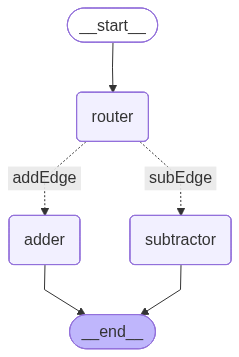

In [19]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
example = app.invoke({"num1": 1, "num2": 3, "operator": "-"})
print(example) #prints the entire state 

{'num1': 1, 'operator': '-', 'num2': 3, 'result': -2}
